In [1]:
#Lets try and create a ML algo for prediction of malignent/begnine breast tumors

In [190]:
#Import Libraries
import os 
import numpy as np 
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
#import the data, create DataFrame
df = pd.read_csv(os.getcwd()+'/data.csv')

In [4]:
#lets take a look at the DataFrame
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#We have 569 records and 33 features. 
#lets look at all the column names and their datatypes to see if we need to do any cleaning:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
#great, looks like everything except for our label(diagnosis) is numerical. 
#lets check for missing values: 
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
#the Unnamed:32 column is filled with missing values, lets drop it. 
df.drop('Unnamed: 32',inplace=True,axis=1)

In [8]:
#We also dont want the ID column as it gives us no predictive information about our label
df.drop('id', inplace=True, axis=1)

In [9]:
#As you can see from the column names: the data can be divded into 3 parts: 
#1.Means 2. Standard errors. 3.Worst Cells
#Each of which contain the same 10 parameters
#Here Mean signifies the means of the all cells, standard Error of all cell and worst signifies the worst cell
#so lets divide the data into 3 dataframes 

mean_cols = [i for i in df.columns if '_mean' in i]
se_cols = [i for i in df.columns if '_se' in i]
worst_cols = [i for i in df.columns if '_worst' in i]

df_m = pd.DataFrame(df, columns=mean_cols)
df_s = pd.DataFrame(df, columns=se_cols)
df_w = pd.DataFrame(df, columns=worst_cols)

#Each column should have 10 features 
print(len(df_m.columns),len(df_s.columns),len(df_w.columns))

10 10 10


In [10]:
#great, lets put our label in its own DataFrame as well: 
label = df['diagnosis']

In [11]:
#lets explore some descriptive stats, especially i want to see the difference between worst and mean.
print('     Mean:\n',df_m.describe())
print('\n\n     Worst:\n',df_w.describe())

     Mean:
        radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000 

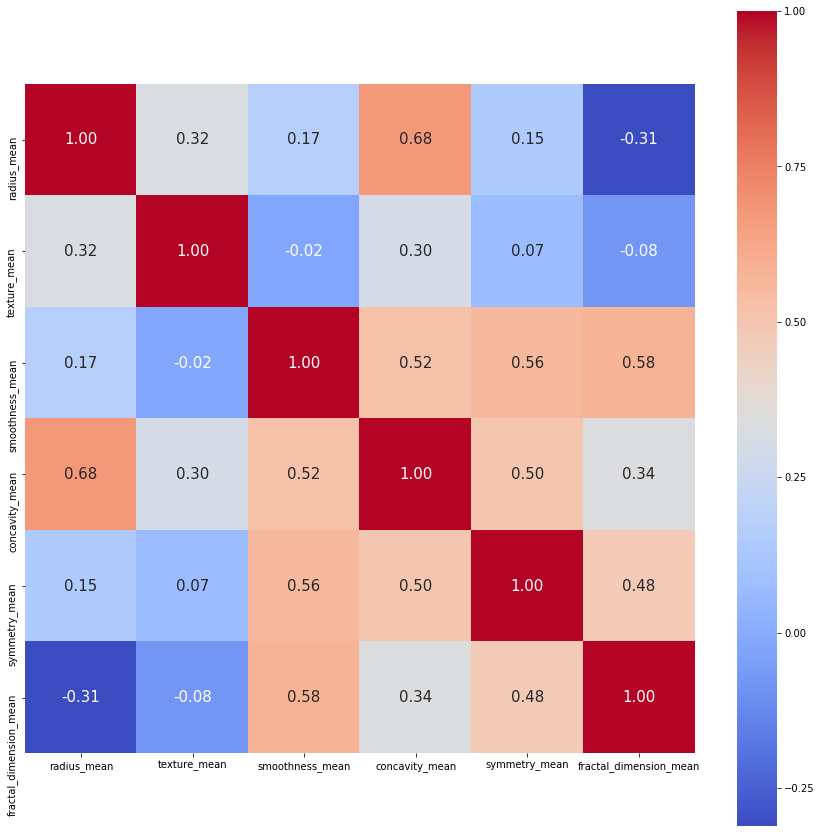

In [207]:
#Looks like, as expected the wrost cells have slightly increased means and STDEV. 
#now lets plot a heatmap to check and remove multicollinearity. 

plt.figure(figsize=(15,15))
sns.heatmap(df_m.corr(), cbar = True,  square = True,
            annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')

In [13]:
#we'll remove features that show high collinearity ~>.80
drop_cols = ['concave points_mean','compactness_mean','area_mean','perimeter_mean']
df_m.drop(drop_cols,inplace=True,axis=1)

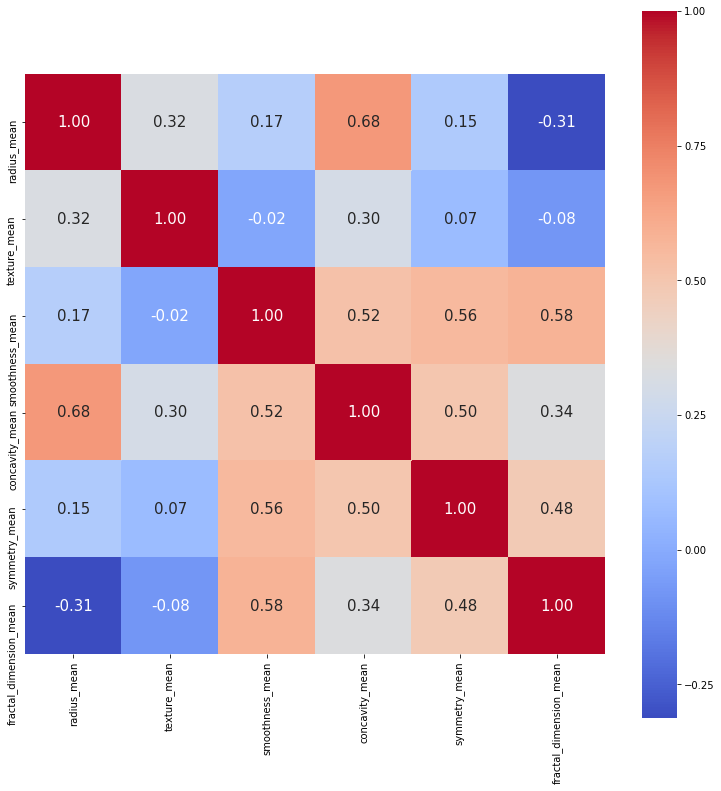

In [208]:
#redraw the heatmap to check again.
plt.figure(figsize=(13,13))
sns.heatmap(df_m.corr(), cbar = True,  square = True,
            annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')

In [15]:
#almost forgot, lets turn that label into numerical: 1 for M, 0 for B:
label = np.where(label=='B',1,0)

In [63]:
#Time to split the dataset: 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_m, label, test_size=0.2)

In [109]:
#lets try different tests and see how they perform: 
#1.Logistic Regression 
#2.KNN 
#3.Random Forest
#4.Support Vector Machine (SVM)

def tests(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test): 
#1. Logistic Reg
    from sklearn.linear_model import LogisticRegression
    ks_model = LogisticRegression().fit(X_train, y_train)
    
    #Predict
    from sklearn.metrics import confusion_matrix
    y_pred_test = ks_model.predict(X_test)
    
    #ConfusionMatrix
    Log_CM = confusion_matrix(y_test, y_pred_test)
    
    #AUC
    from sklearn import metrics
    y_pred_proba = ks_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    Log_auc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    
#2. KNN
    from sklearn.neighbors import KNeighborsClassifier
    neighbor_model = KNeighborsClassifier(n_neighbors=2)
    neighbor_model.fit(X_train, y_train) 
    
    #Predict
    y_pred_test_KNN =neighbor_model.predict(X_test)
    
    #ConfusionMatrix
    KNN_CM = confusion_matrix(y_test, y_pred_test_KNN)
    
    #AUC
    y_pred_proba = neighbor_model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    KNN_auc = metrics.roc_auc_score(y_test, y_pred_proba)    
    
#3.Random Forest
    from sklearn.ensemble import RandomForestClassifier
    ks_rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
    
    #Predict 
    y_pred_test_rf = ks_rf.predict(X_test)
    
    #ConfustionMatrix
    RF_CM = confusion_matrix(y_test, y_pred_test_rf)
    
    #AUC
    y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
    RF_auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)
    
    
#4.Support Vector Machine (SVM)
    from sklearn.svm import SVC
    svc_model = SVC(gamma='auto')
    svc_model.fit(X_train, y_train) 
    
    #Predict
    y_pred_test_SVM = svc_model.predict(X_test)
    
    #ConfusionMatrix 
    SVM_CM = confusion_matrix(y_test, y_pred_test_SVM)
    
    #AUC
    y_pred_proba_SVM = svc_model.predict(X_test)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_SVM)
    SVM_auc = metrics.roc_auc_score(y_test, y_pred_proba_SVM)    
    
    #Results  
    results = [[Log_CM,Log_auc], [KNN_CM,KNN_auc], [RF_CM,RF_auc], [SVM_CM,SVM_auc]]
#     print('\nLogistic regression: \n')
#     print('Confusion Matrix:\n', Log_CM)
#     print('AUC: ', Log_auc)

#     print('\nKNN: \n')
#     print('Confusion Matrix:\n', KNN_CM)
#     print('AUC: ', KNN_auc)    

#     print('\nRandom Forest: \n')
#     print('Confusion Matrix:\n', RF_CM)
#     print('AUC: ', RF_auc)

#     print('\nSVM: \n')
#     print('Confusion Matrix:\n', SVM_CM)
#     print('AUC: ', SVM_auc)    
    return results


In [197]:
#lets cross-validate our model n times: 

def cross_val(n,df=df_m):
    log_list = [] 
    knn_list = [] 
    rf_list = [] 
    svm_list = [] 
    
    for i in range(n):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(df_m, label, test_size=0.1)
        
        log, knn, rf, svm = tests(X_train, X_test, y_train, y_test)
        
        log_list.append(log)
        knn_list.append(knn)
        rf_list.append(rf)
        svm_list.append(svm)
    
    log_CM = [i[0] for i in log_list]
    knn_CM = [i[0] for i in knn_list]
    rf_CM = [i[0] for i in rf_list] 
    svm_CM = [i[0] for i in svm_list]
    #Find averages
    x=0
    for i in log_CM: 
        x+=i
    x_log = x/len(log_CM)
    
    x=0
    for i in knn_CM: 
        x+=i
    x_knn = x/len(knn_CM) 
    
    x=0
    for i in rf_CM: 
        x+=i
    x_rf = x/len(rf_CM)

    x=0
    for i in svm_CM: 
        x+=i
    x_svm = x/len(svm_CM)
    
    log_auc = [i[1] for i in log_list]
    knn_auc = [i[1] for i in knn_list]
    rf_auc = [i[1] for i in rf_list] 
    svm_auc = [i[1] for i in svm_list]    
    
    print('\n1. Logistic regression: \n')
    print('Confusion Matrix:\n', x_log)
    print('\nAUC: ', np.mean(log_auc))

    print('\n1. KNN: \n')
    print('Confusion Matrix:\n', x_knn)
    print('\nAUC: ', np.mean(knn_auc))   

    print('\n1. Random Forest: \n')
    print('Confusion Matrix:\n', x_rf)
    print('\nAUC: ', np.mean(rf_auc))

    print('\n1. SVM: \n')
    print('Confusion Matrix:\n', x_svm)
    print('\nAUC: ', np.mean(svm_auc))  
    
    return 'Completed'

In [204]:
#now lets cross validate each data section and see which data and model is 'best' for prediction:
#Mean measurements
cross_val(200,df_m)


1. Logistic regression: 

Confusion Matrix:
 [[16.735  4.99 ]
 [ 0.955 34.32 ]]

AUC:  0.9623233956170958

1. KNN: 

Confusion Matrix:
 [[19.315  2.41 ]
 [ 6.415 28.86 ]]

AUC:  0.8987720367794213

1. Random Forest: 

Confusion Matrix:
 [[19.78   1.945]
 [ 1.04  34.235]]

AUC:  0.983550666449244

1. SVM: 

Confusion Matrix:
 [[17.585  4.14 ]
 [ 2.055 33.22 ]]

AUC:  0.8756180687213118


'Completed'

In [205]:
#worst measurements
cross_val(200,df_w)


1. Logistic regression: 

Confusion Matrix:
 [[16.59   4.925]
 [ 0.915 34.57 ]]

AUC:  0.9628040941243584

1. KNN: 

Confusion Matrix:
 [[19.145  2.37 ]
 [ 6.42  29.065]]

AUC:  0.8996784181329355

1. Random Forest: 

Confusion Matrix:
 [[19.62   1.895]
 [ 1.095 34.39 ]]

AUC:  0.9832382471876144

1. SVM: 

Confusion Matrix:
 [[17.555  3.96 ]
 [ 1.99  33.495]]

AUC:  0.8794435210135052


'Completed'

In [206]:
#Standard errors of Meaasurements
cross_val(200,df_s)


1. Logistic regression: 

Confusion Matrix:
 [[16.775  4.525]
 [ 0.78  34.92 ]]

AUC:  0.9654262783987433

1. KNN: 

Confusion Matrix:
 [[19.175  2.125]
 [ 6.225 29.475]]

AUC:  0.9068710573782802

1. Random Forest: 

Confusion Matrix:
 [[19.475  1.825]
 [ 1.025 34.675]]

AUC:  0.9832714873345175

1. SVM: 

Confusion Matrix:
 [[17.51   3.79 ]
 [ 2.065 33.635]]

AUC:  0.8816092055737497


'Completed'

In [ ]:
#In conclusion, we can see that for all data tiers the Random forrest, closely followed by the
#logistic regression offer the best predictive power.
#secondly, it appears the 3 data tiers whare the same population mean.

In [ ]:
#With an AUC of 0.98+ and confusion matrix showing so little false negatives and false positives 
#  tells us this model is quite powerful.

In [ ]:
#Limitations: more records would make this finding more robust.